# Module 4 Activities

The exercises in this page will allow you to demonstrate your ability to:

* Manage date and time types in Python.
* Use iterators to automate data processing.
* Access files in a variety of formats, including text files, CSV files, and JSON files.

Links are provided for activities that require a specific file, but you may already have copies of some files from earlier lessons and activities. If you already have a file with the same name in your *data* folder, you may use that file instead of downloading a new copy.

In [1]:
# Imports
import json
import pandas as pd
import os

### Activity 1: New York Restaurants

Use Python to find the following information using the [restaurant.json](https://the-software-guild.s3.amazonaws.com/techstart-1909/data-files/restaurant.json) file.

1. Compute the average score for each restaurant.
1. Compute the minimum score for each restaurant.
1. Compute the maximum score for each restaurant.
1. Compute the average score for each type of cuisine in each borough.
1. Compute the minimum score for each type of cuisine in each borough.
1. Compute the maximum score for each type of cuisine in each borough.

**Challenge**: Identify at least three other values in the dataset that you can use to calculate average, minimum, and maximum values, and find those values.

In [43]:
file = open("./data/restaurant.json")
restaurants = [json.loads(obj) for obj in file.read().split("\n") if "{" in obj]
boroughs = {}

for restaurant in restaurants:
    scores = [grade["score"] for grade in restaurant["grades"]]
    if len(scores) != 0 and None not in scores:
        restaurant["average_score"] = sum(scores) / len(scores)
        restaurant["min_score"] = min(scores)
        restaurant["max_score"] = max(scores)

        print(
            f"{restaurant['name']} = min: {restaurant['min_score']} | max: {restaurant['max_score']} | avg: {restaurant['max_score']:.1f}"
        )

        if restaurant["borough"] not in boroughs.keys():
            boroughs[restaurant["borough"]] = {}
        if restaurant["cuisine"] not in boroughs[restaurant["borough"]].keys():
            boroughs[restaurant["borough"]][restaurant["cuisine"]] = {}
            boroughs[restaurant["borough"]][restaurant["cuisine"]][
                "average_scores"
            ] = []
            boroughs[restaurant["borough"]][restaurant["cuisine"]]["min_scores"] = []
            boroughs[restaurant["borough"]][restaurant["cuisine"]]["max_scores"] = []

        boroughs[restaurant["borough"]][restaurant["cuisine"]]["average_scores"].append(
            restaurant["average_score"]
        )
        boroughs[restaurant["borough"]][restaurant["cuisine"]]["min_scores"].append(
            restaurant["min_score"]
        )
        boroughs[restaurant["borough"]][restaurant["cuisine"]]["max_scores"].append(
            restaurant["max_score"]
        )

for borough in boroughs.keys():
    print(f"\n{borough} ----------------------")
    for cuisine in boroughs[borough].keys():
        boroughs[borough][cuisine]["average_score"] = sum(
            boroughs[borough][cuisine]["average_scores"]
        ) / len(boroughs[borough][cuisine]["average_scores"])
        boroughs[borough][cuisine]["min_score"] = min(
            boroughs[borough][cuisine]["min_scores"]
        )
        boroughs[borough][cuisine]["max_score"] = max(
            boroughs[borough][cuisine]["max_scores"]
        )
        print(
            f"\t{cuisine} = min: {boroughs[borough][cuisine]['min_score']} | max: {boroughs[borough][cuisine]['max_score']} | avg: {boroughs[borough][cuisine]['max_score']:.1f}"
        )

Morris Park Bake Shop = min: 2 | max: 14 | avg: 14.0
Wendy'S = min: 8 | max: 23 | avg: 23.0
Dj Reynolds Pub And Restaurant = min: 2 | max: 12 | avg: 12.0
Riviera Caterer = min: 5 | max: 12 | avg: 12.0
Tov Kosher Kitchen = min: 13 | max: 25 | avg: 25.0
Brunos On The Boulevard = min: 7 | max: 38 | avg: 38.0
Kosher Island = min: 9 | max: 12 | avg: 12.0
Wilken'S Fine Food = min: 8 | max: 13 | avg: 13.0
Regina Caterers = min: 2 | max: 12 | avg: 12.0
Taste The Tropics Ice Cream = min: 5 | max: 12 | avg: 12.0
Wild Asia = min: 3 | max: 11 | avg: 11.0
C & C Catering Service = min: 2 | max: 5 | avg: 5.0
May May Kitchen = min: 7 | max: 56 | avg: 56.0
1 East 66Th Street Kitchen = min: 0 | max: 6 | avg: 6.0
Seuda Foods = min: 7 | max: 19 | avg: 19.0
Carvel Ice Cream = min: 2 | max: 13 | avg: 13.0
Carvel Ice Cream = min: 9 | max: 13 | avg: 13.0
Nordic Delicacies = min: 3 | max: 10 | avg: 10.0
Glorious Food = min: 9 | max: 16 | avg: 16.0
The Movable Feast = min: 2 | max: 13 | avg: 13.0
Sal'S Deli = m

### Activity 2: Stocks

Download this file to use for this activity: [stocks.zip](https://the-software-guild.s3.amazonaws.com/techstart-1909/data-files/stocks.zip)

* You will need to extract or uncompress the zip file before using the data.
* After extracting the file, look through the file to see the raw data it contains and how the data is structured.

Use Python to find the following information:

In [49]:
success = []
errors = []
for file in os.listdir("../data/stocks/"):
    try:
        table = pd.read_csv(f"../data/stocks/{file}")
        table["Company"] = file.split(".")[0].upper()
        success.append(table)
    except:
        errors.append(file.split(".")[0].upper())

stocks = pd.concat(success)
first_column = stocks.pop("Company")
stocks.insert(0, "Company", first_column)

1. Return a list of all company indexes that appear at least once in the dataset, sorted alphabetically by index value.


In [50]:
print("Companies with Data:")
print(", ".join(sorted(stocks["Company"].unique())))
stocks["Date"] = pd.to_datetime(stocks["Date"])

Companies with Data:
A, AA, AAAP, AABA, AAC, AAL, AAMC, AAME, AAN, AAOI, AAON, AAP, AAPL, AAT, AAU, AAV, AAWW, AAXN, AB, ABAC, ABAX, ABB, ABBV, ABC, ABCB, ABCD, ABCO, ABDC, ABE, ABEO, ABEOW, ABEV, ABG, ABIL, ABIO, ABLX, ABM, ABMD, ABR, ABRN, ABR_A, ABR_B, ABR_C, ABT, ABTX, ABUS, ABX, ABY, AC, ACAD, ACBI, ACC, ACCO, ACER, ACERW, ACET, ACFC, ACGL, ACGLO, ACGLP, ACH, ACHC, ACHN, ACHV, ACIA, ACIU, ACIW, ACLS, ACM, ACMR, ACN, ACNB, ACOR, ACP, ACRE, ACRS, ACRX, ACSF, ACSI, ACST, ACTA, ACTG, ACU, ACV, ACXM, ACY, ADAP, ADBE, ADC, ADES, ADHD, ADI, ADM, ADMA, ADMP, ADMS, ADNT, ADOM, ADP, ADRO, ADS, ADSK, ADSW, ADTN, ADUS, ADVM, ADX, ADXS, ADXSW, AE, AEB, AED, AEE, AEG, AEGN, AEH, AEHR, AEIS, AEK, AEL, AEM, AEMD, AEO, AEP, AER, AERI, AES, AET, AETI, AEUA, AEY, AEZS, AFAM, AFB, AFC, AFG, AFGE, AFGH, AFH, AFHBL, AFI, AFL, AFMD, AFSD, AFSI, AFSI_A, AFSI_B, AFSI_C, AFSI_D, AFSI_E, AFSI_F, AFSS, AFST, AFT, AFTY, AG, AGC, AGCO, AGD, AGEN, AGFS, AGFSW, AGGE, AGGP, AGGY, AGI, AGII, AGIIL, AGIO, AGLE, AGM

2. Return the number of publicly traded companies for each year in the dataset.


Number of companies per year:


<Axes: xlabel='Date', ylabel='Number of Companies'>

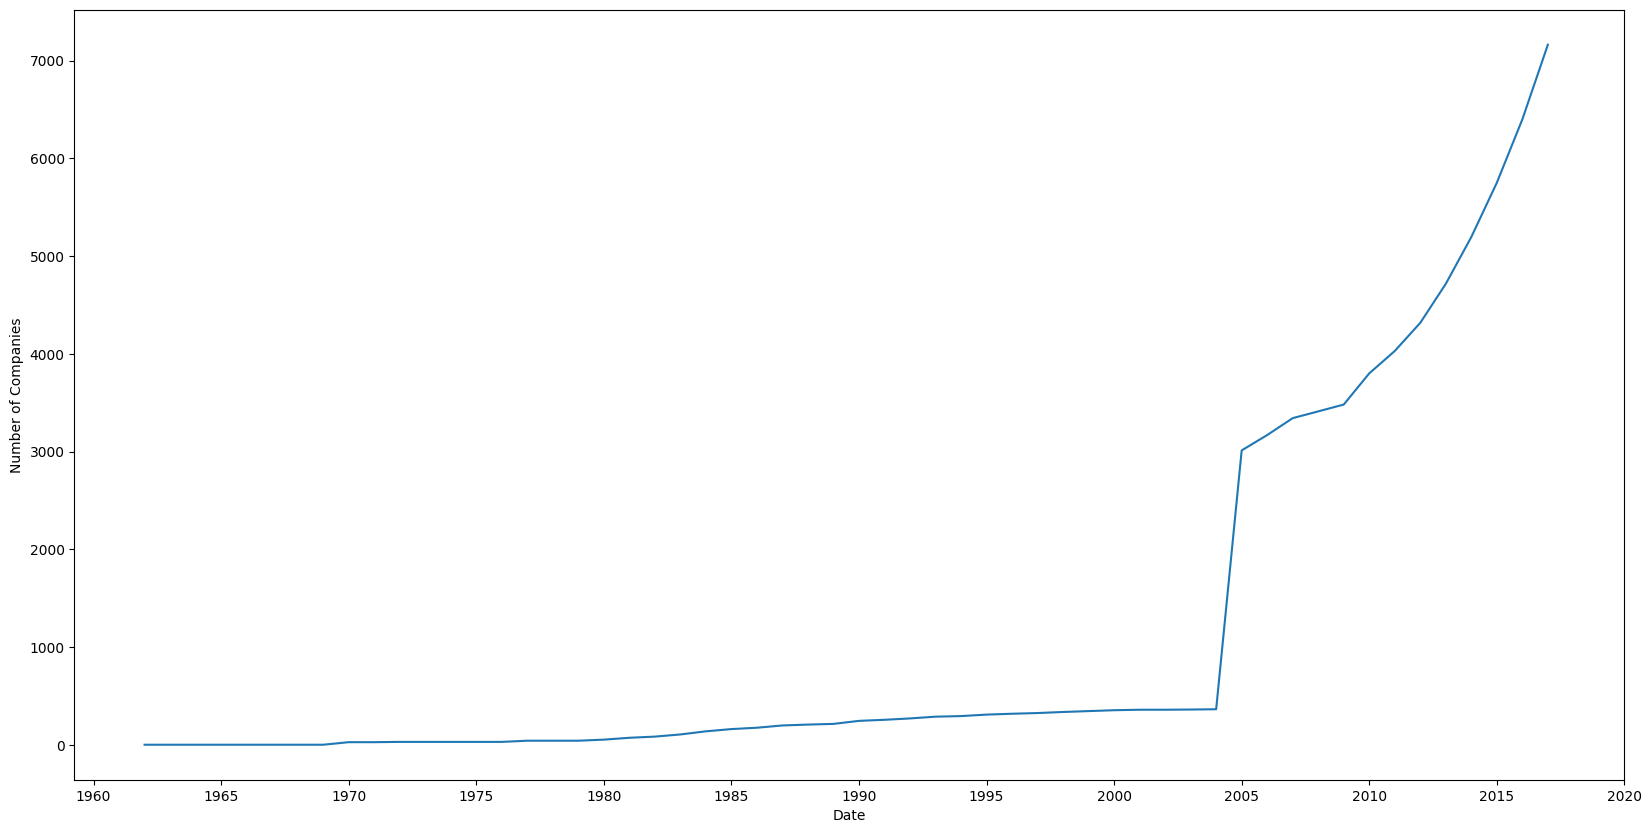

In [71]:
print("Number of companies per year:")
stocks["Company"].groupby([stocks["Date"].dt.year]).nunique().plot(
    kind="line",
    figsize=(20, 10),
    xticks=range(1960, 2025, 5),
    ylabel="Number of Companies",
)

3. Return a list of company indexes that were publicly traded in each year in the dataset, grouped by year.
        * For example, the output should look something like this:
```Py
[ "Year 1":[index1,index2,index3,….], "Year 2": [index1,index2,index3,….], &hellip; ]

In [52]:
print("Companies grouped by year:")
stocks["Company"].groupby([stocks["Date"].dt.year]).unique()

Companies grouped by year:


Date
1962                                            [IBM, GE]
1963                                            [IBM, GE]
1964                                            [IBM, GE]
1965                                            [IBM, GE]
1966                                            [IBM, GE]
1967                                            [IBM, GE]
1968                                            [IBM, GE]
1969                                            [IBM, GE]
1970    [IBM, CNP, KO, MCD, MRO, XOM, BA, JPM, GT, ED,...
1971    [IBM, CNP, KO, MCD, MRO, XOM, BA, JPM, GT, ED,...
1972    [IBM, CNP, KO, INTC, WMT, MCD, MRO, XOM, BA, J...
1973    [IBM, CNP, KO, INTC, WMT, MCD, MRO, XOM, BA, J...
1974    [IBM, CNP, KO, INTC, WMT, MCD, MRO, XOM, BA, J...
1975    [IBM, CNP, KO, INTC, WMT, MCD, MRO, XOM, BA, J...
1976    [IBM, CNP, KO, INTC, WMT, MCD, MRO, XOM, BA, J...
1977    [IBM, CNP, KO, INTC, WMT, MCD, MRO, GD, XOM, W...
1978    [IBM, CNP, KO, INTC, WMT, MCD, MRO, GD, XOM, W...
1979    [

4. Use a company index value and return all historical pricing data for the company.


For Apple:


<Axes: xlabel='Date', ylabel='Price'>

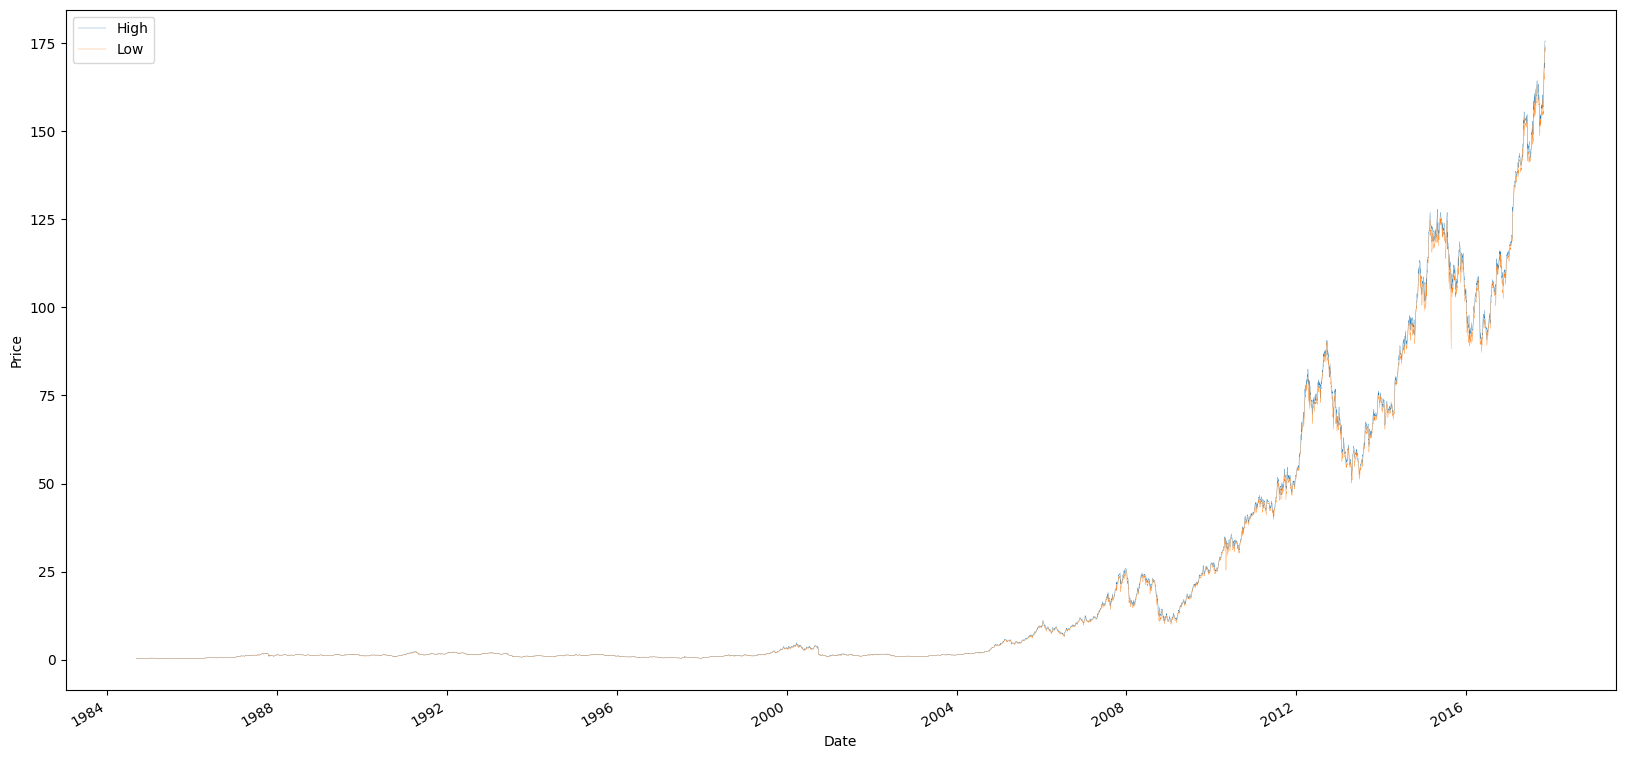

In [72]:
print("For Apple:")
stocks[stocks["Company"] == "AAPL"].plot(
    x="Date", y=["High", "Low"], kind="line", lw=0.2, figsize=(20, 10), ylabel="Price"
)

5. Use a company index value and year and return the pricing data for the company for that particular year.


For Apple in 2012:


<Axes: xlabel='Date', ylabel='Price'>

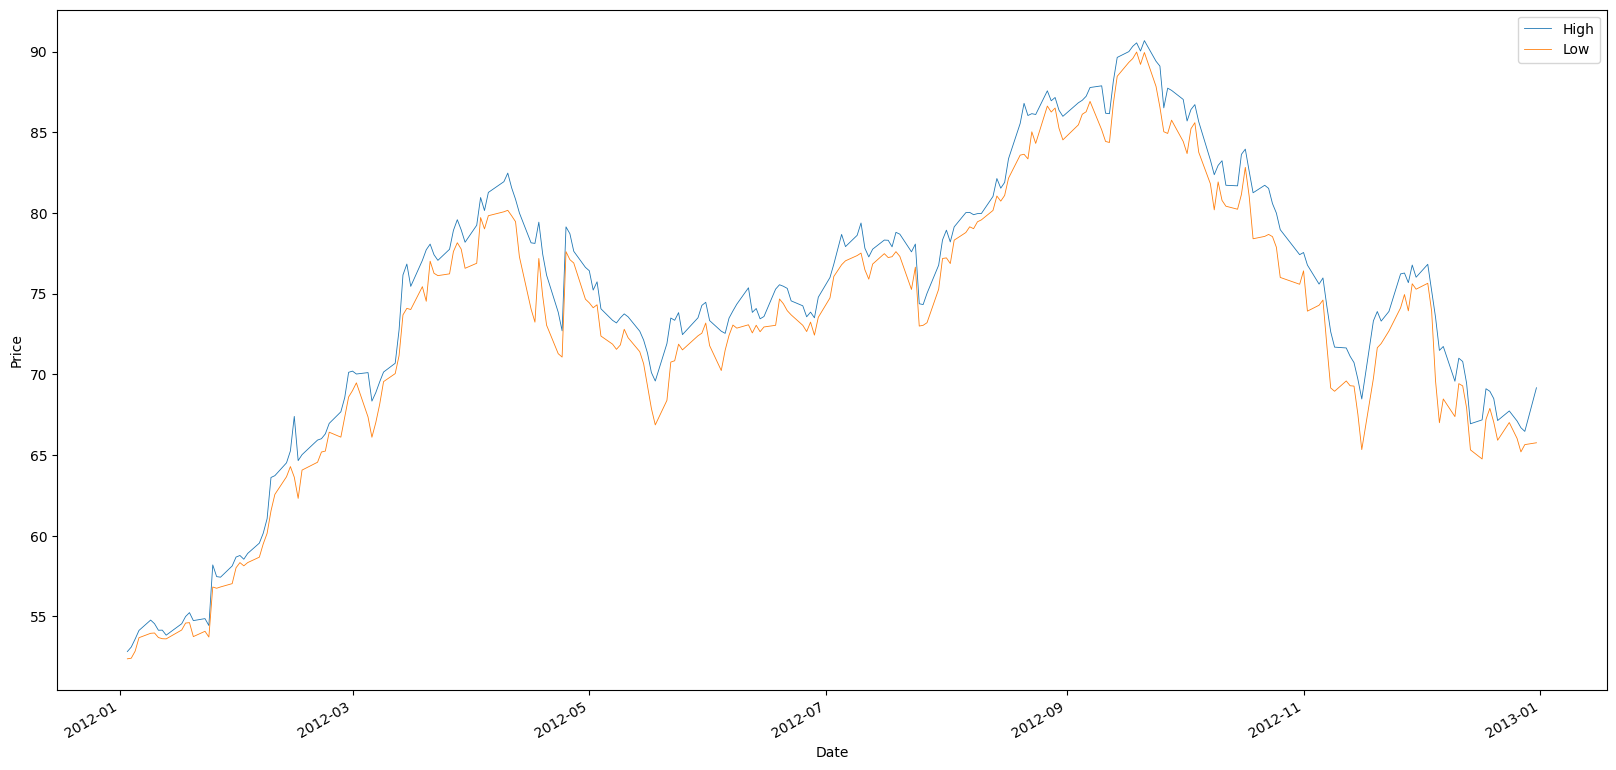

In [77]:
print("For Apple in 2012:")
stocks[(stocks["Company"] == "AAPL") & (stocks["Date"].dt.year == 2012)].plot(
    x="Date", y=["High", "Low"], kind="line", lw=0.6, figsize=(20, 10), ylabel="Price"
)

6. Use a company index value, a year, and a month, and return all pricing data for the company for that particular year and month.


For Apple in March 2012:


<Axes: xlabel='Date', ylabel='Price'>

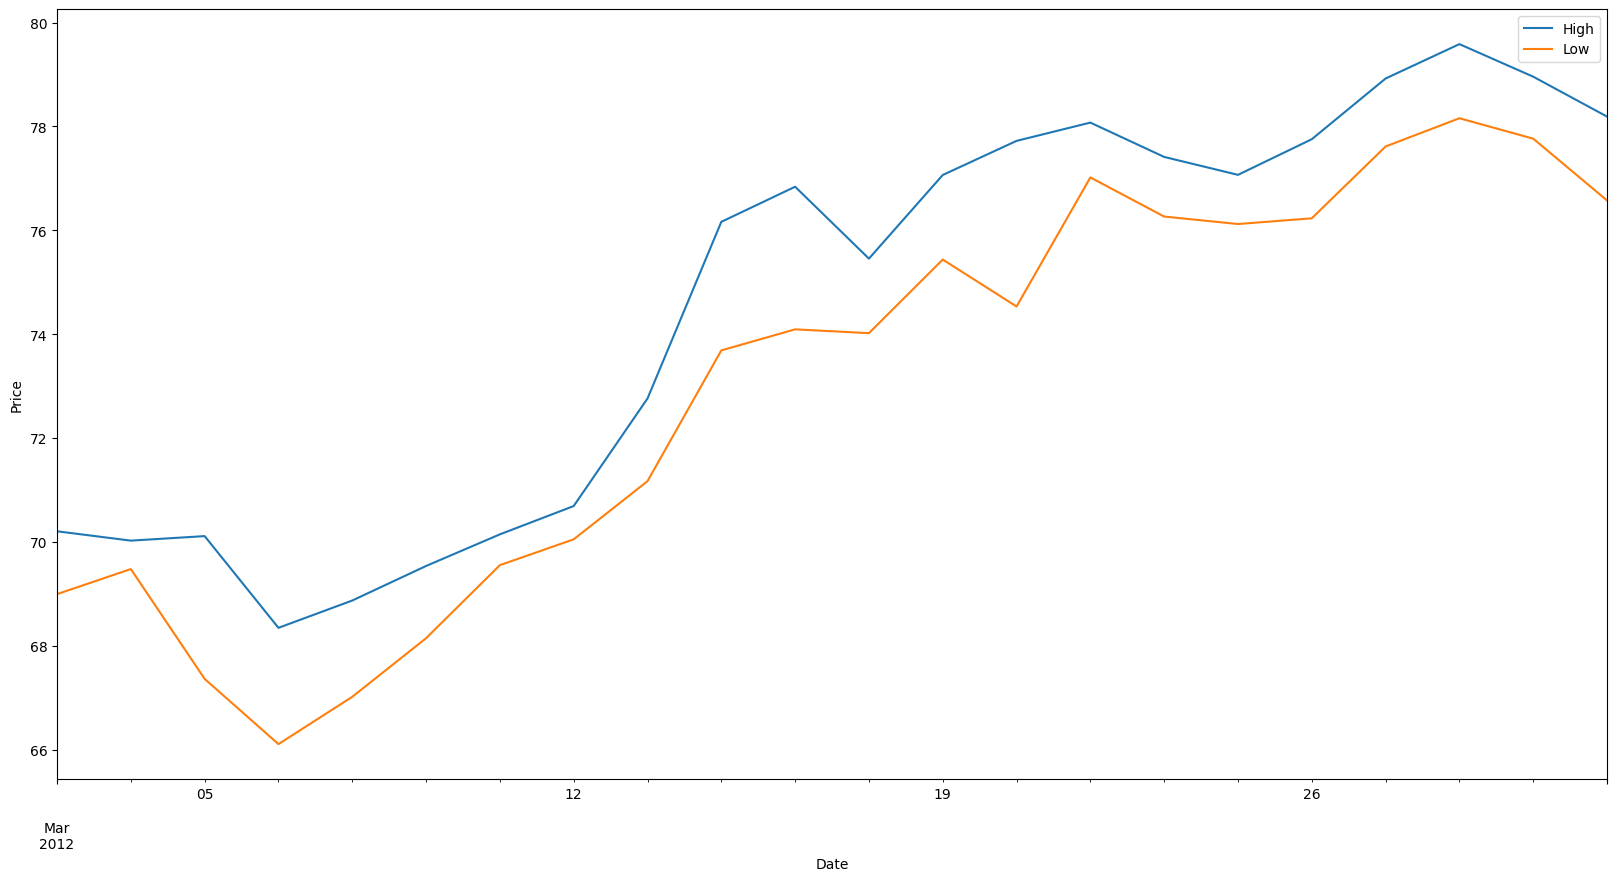

In [80]:
print("For Apple in March 2012:")
stocks[
    (stocks["Company"] == "AAPL")
    & (stocks["Date"].dt.year == 2012)
    & (stocks["Date"].dt.month == 3)
].plot(x="Date", y=["High", "Low"], kind="line", figsize=(20, 10), ylabel="Price")

7. Choose a year and return the list of companies that were publicly traded during that year.
        * The results should include all companies that traded for at least one day during the given year.

In [86]:
print("Companies traded in 1999:")
stocks[stocks["Date"].dt.year == 1999]["Company"].unique()

Companies traded in 1999:


array(['BLL', 'TMO', 'CECO', 'EMR', 'MCHP', 'IBM', 'CNP', 'SNA', 'HAS',
       'LB', 'COF', 'LNC', 'KO', 'CLX', 'X', 'APC', 'INTC', 'IFF', 'DOV',
       'XLNX', 'GPS', 'WEN', 'BRK-B', 'ADM', 'XL', 'T', 'WMT', 'RTN',
       'MAT', 'EBAY', 'LEG', 'CTXS', 'XRAY', 'EQR', 'LUV', 'MCD', 'DGX',
       'BBY', 'TWX', 'NKE', 'BC', 'SEE', 'CAG', 'ADSK', 'MSA', 'PHM',
       'MSFT', 'CA', 'MRO', 'JWN', 'KEY', 'BEN', 'GD', 'PX', 'CPB',
       'DISH', 'XOM', 'PKI', 'PDCO', 'MXIM', 'WY', 'PLD', 'RAVE', 'EFX',
       'STT', 'SPG', 'HIG', 'MTB', 'FHN', 'JBL', 'ETFC', 'BA', 'BBBY',
       'WOR', 'JPM', 'WMB', 'KSS', 'BDX', 'ABX', 'PBI', 'ODP', 'LOW',
       'PCG', 'SNPS', 'COP', 'ABT', 'INTU', 'KLAC', 'TJX', 'WBA', 'TIF',
       'SYK', 'PEP', 'AEM', 'LAMR', 'APA', 'NTAP', 'UPS', 'KBH', 'GT',
       'LEU', 'PH', 'CIEN', 'NTRS', 'ED', 'DUK', 'CCE', 'DTE', 'AZO',
       'UTX', 'FLEX', 'COST', 'MAR', 'CSX', 'BSX', 'APHB', 'HRB', 'CMCSA',
       'DYN', 'ENSV', 'R', 'DIS', 'AXGN', 'LLY', 'SPGI', 'DLTR', 'AEE'

### Activity 3: Nobel Laureates

Download the [laureate.json](https://the-software-guild.s3.amazonaws.com/techstart-1909/data-files/laureate.json) file for this activity, if you do not already have it from an earlier lesson or exercise. This file contains details about Nobel Laureates.

Use this dataset to answer the following questions:

In [63]:
laureatesDict = json.load(open("../data/laureate.json"))["laureates"]
laureates = []
for laureate in laureatesDict:
    laureates.append(pd.DataFrame(laureate))

laureates = pd.concat(laureates)
laureates

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,prizes
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,"{'year': '1901', 'category': 'physics', 'share..."
0,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,"{'year': '1902', 'category': 'physics', 'share..."
0,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,"{'year': '1902', 'category': 'physics', 'share..."
0,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,"{'year': '1903', 'category': 'physics', 'share..."
0,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,"{'year': '1903', 'category': 'physics', 'share..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,965,Sir Gregory P.,Winter,1951-04-14,0000-00-00,United Kingdom,GB,Leicester,NaN,NaN,NaN,male,"{'year': '2018', 'category': 'chemistry', 'sha..."
0,966,Denis,Mukwege,1955-03-01,0000-00-00,Belgian Congo (now Democratic Republic of the ...,NaN,Bukavu,NaN,NaN,NaN,male,"{'year': '2018', 'category': 'peace', 'share':..."
0,967,Nadia,Murad,0000-00-00,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,female,"{'year': '2018', 'category': 'peace', 'share':..."
0,968,William D.,Nordhaus,1941-05-31,0000-00-00,USA,US,"Albuquerque, NM",NaN,NaN,NaN,male,"{'year': '2018', 'category': 'economics', 'sha..."


1. Identify the country with the most laureates.
2. Identify the country with the fewest laureates.

In [64]:
laureates.groupby("bornCountry").size().sort_values(ascending=False)

bornCountry
USA                             271
United Kingdom                   85
Germany                          63
France                           52
Sweden                           29
                               ... 
Poland (now Belarus)              1
Poland (now Lithuania)            1
Poland (now Ukraine)              1
Cyprus                            1
Austria-Hungary (now Poland)      1
Length: 121, dtype: int64

3. Identify the city with the most laureates.
4. Identify the city with the fewest laureates.

In [65]:
laureates.groupby("bornCity").size().sort_values(ascending=False)

bornCity
New York, NY        47
Paris               25
London              19
Vienna              14
Chicago, IL         12
                    ..
Hillsboro, WV        1
Hildesheim           1
Higashimatsuyama     1
Heredia              1
Örebro               1
Length: 615, dtype: int64

5. Identify the oldest laureate to ever receive a prize.


In [165]:
def oldestWin(laureate):
    if laureate["born"] == "0000-00-00":
        return -1
    return max(
        [
            int(prize["year"]) - int(laureate["born"].split("-")[0])
            for prize in laureate["prizes"]
        ]
    )


oldestRecepient = max(laureatesDict, key=lambda laureate: oldestWin(laureate))
print(
    f"{oldestRecepient['firstname']} {oldestRecepient['surname']} at the age of {oldestWin(oldestRecepient)}"
)

Arthur Ashkin at the age of 96


6. How many laureates died in Germany but were not born in Germany?


In [110]:
num = laureates[
    (laureates["bornCountryCode"] != "DE") & (laureates["diedCountryCode"] == "DE")
]["id"].count()

print(f"{num} laureates were born outside of Germany but died in Germany")

18 laureates were born outside of Germany but died in Germany


7. How many laureates died in the USA but were not born in the USA?


In [111]:
num = laureates[
    (laureates["bornCountryCode"] != "US") & (laureates["diedCountryCode"] == "US")
]["id"].count()

print(f"{num} laureates were born outside of the USA but died in the USA")

71 laureates were born outside of the USA but died in the USA


8. How many laureates died in the USA and were born in the USA?


In [112]:
num = laureates[
    (laureates["bornCountryCode"] == "US") & (laureates["diedCountryCode"] == "US")
]["id"].count()

print(f"{num} laureates were born in the USA and died in the USA")

147 laureates were born in the USA and died in the USA


9. How many laureates were born in Chicago?


In [126]:
num = laureates[laureates["bornCity"] == "Chicago, IL"]["id"].count()

print(f"{num} laureates were born in Chicago, IL")

12 laureates were born in Chicago, IL


10. Have any laureates won more than one prize?


In [135]:
count = 0

for laureate in laureatesDict:
    if len(laureate["prizes"]) > 1:
        count += 1

print(f"{count} laureates have won more than one prize")

6 laureates have won more than one prize


### Stretch Activity (Complete After the Module 4 Assessment)

This activity uses Python to analyze the text of reviews for a set of Amazon products. This type of analysis can be useful in a variety of settings, including helping vendors understand how customers perceive their products or as the basis for a smart analysis to distinguish legitimate reviews from fake reviews.

1. Read the [reviews.json](https://the-software-guild.s3.amazonaws.com/datascience/track1-1909/reviews.json) file, which contains reviews about Amazon products.
1. For each review in the dataset, access the `reviewText` attribute and perform the following operations:
    * Split the review text into words and convert all text to lowercase.
    * Remove the stop words.
    * Lemmatize the words.
    * Compute the frequency of occurrence of each word, saved in a dictionary where the word is the key and the frequency is the value.
    * Save the dictionary in a JSON file where each file looks like this:

        {
            reviewID:{word_1:word_1_count,word_2:word_2_count, ... ,word_N:word_N_count
        }

In [4]:
# your code here